Эпоха 1/10, Потери: 0.3955
Эпоха 2/10, Потери: 0.3567
Эпоха 3/10, Потери: 0.3506
Эпоха 4/10, Потери: 0.3471
Эпоха 5/10, Потери: 0.3422
Эпоха 6/10, Потери: 0.3430
Эпоха 7/10, Потери: 0.3402
Эпоха 8/10, Потери: 0.3369
Эпоха 9/10, Потери: 0.3387
Эпоха 10/10, Потери: 0.3366
Точность на MNIST: 80.45%


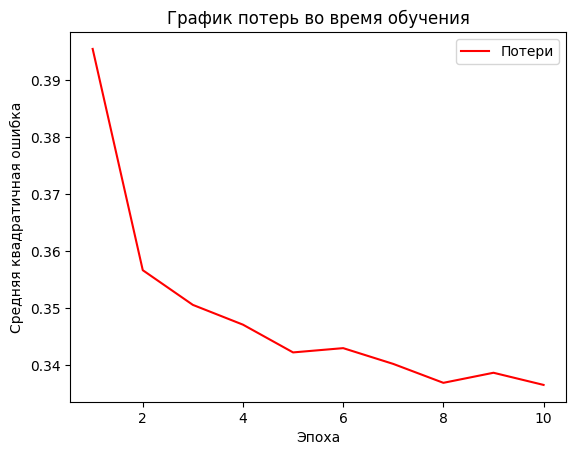

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt  # Для графиков

# === Функции активации ===
def step_activation(x):
    """Шаговая функция активации: 1, если x >= 0, иначе 0 (Шаг 3 — формула 1.2)"""
    return np.where(x >= 0, 1, 0)

# === Класс Персептрона с методом подкрепления ===
class ReinforcementPerceptron:
    def __init__(self, input_size, output_size, epochs=10):
        """
        Шаг 1: Инициализация весов и порогов
        Генератором случайных чисел всем синаптическим весам и порогам присваиваются малые случайные значения.
        """
        self.weights = np.random.uniform(-0.1, 0.1, (input_size, output_size))  # Весовая матрица [784, 10]
        self.thresholds = np.random.uniform(-0.1, 0.1, output_size)  # Пороги чувствительности [10]
        self.epochs = epochs
        self.loss_history = []  # Для отслеживания ошибки

    def predict(self, inputs):
        """
        Шаг 3: Расчёт взвешенной суммы и получение выходного сигнала yj по формуле 1.1 и 1.2
        net_j = ∑ x_i * w_i,j - θ_j
        y_j = 1, если net_j >= 0; иначе 0
        """
        net = np.dot(inputs, self.weights) - self.thresholds
        return step_activation(net)

    def train(self, training_data, labels):
        """
        Шаги 2–5: Обучение методом подкрепления

        Шаг 2: Подать входной образ x1,...xn — он уже подаётся по очереди в цикле.

        Шаг 4а: Определить, соответствует ли выход yj желаемому результату.

        Шаг 4б: Если yj=0 и должен быть 1 → положительное подкрепление (увеличить веса активных входов)
        Шаг 4в: Если yj=1 и должен быть 0 → отрицательное подкрепление (уменьшить веса активных входов)

        Шаг 5: Повторять до окончания эпох или пока ошибка не исчезнет.
        """
        for epoch in range(self.epochs):
            total_loss = 0  # Для подсчета общей ошибки

            for inputs, expected in zip(training_data, labels):
                output = self.predict(inputs)

                # Перебор каждого выходного нейрона j
                for j in range(len(output)):
                    if output[j] != expected[j]:  # Шаг 4а: выход yj неправильный
                        if expected[j] == 1:
                            self.weights[:, j] += inputs  # Шаг 4б: положительное подкрепление
                        else:
                            self.weights[:, j] -= inputs  # Шаг 4в: отрицательное подкрепление

                # Ошибка по формуле: (y_true - y_pred)^2
                total_loss += np.sum((expected - output) ** 2)

            # Сохраняем ошибку за эпоху
            self.loss_history.append(total_loss / len(training_data))
            print(f"Эпоха {epoch + 1}/{self.epochs}, Потери: {self.loss_history[-1]:.4f}")

    def test(self, test_data, test_labels):
        """Тестирование модели: сравнение предсказанных и истинных классов"""
        predictions = self.predict(test_data)
        predicted_classes = np.argmax(predictions, axis=1)
        true_classes = np.argmax(test_labels, axis=1)
        accuracy = np.mean(predicted_classes == true_classes) * 100
        return accuracy

    def plot_loss(self):
        """Построение графика функции потерь"""
        plt.plot(range(1, self.epochs + 1), self.loss_history, label="Потери", color="red")
        plt.xlabel("Эпоха")
        plt.ylabel("Средняя квадратичная ошибка")
        plt.title("График потерь во время обучения")
        plt.legend()
        plt.show()

# === Загрузка датасета MNIST (образы цифр от 0 до 9) ===
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# === Шаг 2: Подготовка входных образов ===
X_train = X_train.reshape(-1, 28 * 28) / 255.0  # Нормализация входов (от 0 до 1)
X_test = X_test.reshape(-1, 28 * 28) / 255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)  # One-hot метки: [0,0,1,0,...]
y_test = tf.keras.utils.to_categorical(y_test, 10)

# === Создание и обучение модели ===
perceptron = ReinforcementPerceptron(input_size=784, output_size=10, epochs=10)
perceptron.train(X_train, y_train)

# === Тестирование ===
accuracy = perceptron.test(X_test, y_test)
print(f"Точность на MNIST: {accuracy:.2f}%")

# === Визуализация ошибок обучения ===
perceptron.plot_loss()
